In this script I'm trying out a simple implementation of the EM-algorithm.  
The goal is, given an array of trials where two dice with a bias $p$ towards landing on heads have been thrown a fixed amount of time per dice, to estimate the bias values of the two dice $p_A$ and $p_B$, given only the head and tail counts per throw, but not knowing which dice has generated which trial. In this case, the hidden variables are the fact that the algorithm doesn't know which dice has generated which trial, and the parameters to be estimated are the biases of the two coins. Specifically for this implementation, these are the steps the algorithm takes:  
-First, choose an initial guess for the biases, here given by $p_A=p_B=0.5$.  
-For the E-step, we give an estimate of the probability of coin A or B having thrown each trial, this is given by, for both coins:  
$P_{A,k}=\binom{n}{h_k}p_{A}^{h_k}(1-p_A)^{n-h_k}$  
$P_{B,k}=\binom{n}{h_k}p_{A}^{h_k}(1-p_A)^{n-h_k}$  
Where $h_k$ is the amount of heads flipped in trial $k$ and $n$ the total number of coins flipped for each trial (here 10).  
We then normalize these values so they sum to 1, to give a real estimate of the "probability" of coin A and B having generated each trial:  
$\gamma_{A,k}=P_{A,k}/(P_{A,k}+P_{B,k})$  
$\gamma_{B,k}=P_{B,k}/(P_{A,k}+P_{B,k})$  
We now have an estimate of the probability for each trial of coin A and B having generated it.  
-For the M-step, we recalculate the biases for coins A and B, using the formula  
$p_{A}^{\text{new}}=(\sum_i\gamma_{A,i}(\text{nr of heads of trial}\ i))/(n\sum_i\gamma_{A,i})$  
$p_{B}^{\text{new}}=(\sum_i\gamma_{B,i}(\text{nr of heads of trial}\ i))/(n\sum_i\gamma_{B,i})$  
Here we essentially take the weighted average of each amount of heads flipped per trial, weighted by the "probability" of the trial being generated by A or B.  
The algorithm then repeats until convergence.


In [2]:
import numpy as np
from scipy.stats import binom
import matplotlib.pyplot as plt

In [3]:
# define biases
A_BIAS = 0.65 # unknown (true bias of A)
B_BIAS = 0.55 # unknown (true bias of B)

# number of coinflips per trial
N = 20

# generate trials
NUM_A_TRIALS = 20 # unknown
NUM_B_TRIALS = 20 # unknown
trials = []

n_heads_A = np.random.binomial(N, A_BIAS, NUM_A_TRIALS)
n_heads_B = np.random.binomial(N, B_BIAS, NUM_B_TRIALS)

for i in range(NUM_A_TRIALS):
    # only n_heads value is known, not coin
    trials.append({"n_heads": n_heads_A[i], "coin": "A"})

for i in range(NUM_B_TRIALS):
    # only n_heads value is known, not coin
    trials.append({"n_heads": n_heads_B[i], "coin": "B"})

for i in trials:
    print(i)

{'n_heads': np.int32(14), 'coin': 'A'}
{'n_heads': np.int32(12), 'coin': 'A'}
{'n_heads': np.int32(12), 'coin': 'A'}
{'n_heads': np.int32(11), 'coin': 'A'}
{'n_heads': np.int32(13), 'coin': 'A'}
{'n_heads': np.int32(17), 'coin': 'A'}
{'n_heads': np.int32(15), 'coin': 'A'}
{'n_heads': np.int32(13), 'coin': 'A'}
{'n_heads': np.int32(15), 'coin': 'A'}
{'n_heads': np.int32(12), 'coin': 'A'}
{'n_heads': np.int32(16), 'coin': 'A'}
{'n_heads': np.int32(11), 'coin': 'A'}
{'n_heads': np.int32(15), 'coin': 'A'}
{'n_heads': np.int32(12), 'coin': 'A'}
{'n_heads': np.int32(14), 'coin': 'A'}
{'n_heads': np.int32(14), 'coin': 'A'}
{'n_heads': np.int32(13), 'coin': 'A'}
{'n_heads': np.int32(14), 'coin': 'A'}
{'n_heads': np.int32(12), 'coin': 'A'}
{'n_heads': np.int32(13), 'coin': 'A'}
{'n_heads': np.int32(13), 'coin': 'B'}
{'n_heads': np.int32(15), 'coin': 'B'}
{'n_heads': np.int32(9), 'coin': 'B'}
{'n_heads': np.int32(10), 'coin': 'B'}
{'n_heads': np.int32(11), 'coin': 'B'}
{'n_heads': np.int32(4), '

iteration: 0
trial:
{'n_heads': np.int32(14), 'coin': 'A'}
prob A and B norm: 0.6965389854382452 0.3034610145617548
trial:
{'n_heads': np.int32(12), 'coin': 'A'}
prob A and B norm: 0.49853340163373755 0.5014665983662624
trial:
{'n_heads': np.int32(12), 'coin': 'A'}
prob A and B norm: 0.49853340163373755 0.5014665983662624
trial:
{'n_heads': np.int32(11), 'coin': 'A'}
prob A and B norm: 0.39550381562684384 0.6044961843731562
trial:
{'n_heads': np.int32(13), 'coin': 'A'}
prob A and B norm: 0.6016876841044089 0.39831231589559124
trial:
{'n_heads': np.int32(17), 'coin': 'A'}
prob A and B norm: 0.8895326445136639 0.11046735548633611
trial:
{'n_heads': np.int32(15), 'coin': 'A'}
prob A and B norm: 0.7771681228941465 0.2228318771058535
trial:
{'n_heads': np.int32(13), 'coin': 'A'}
prob A and B norm: 0.6016876841044089 0.39831231589559124
trial:
{'n_heads': np.int32(15), 'coin': 'A'}
prob A and B norm: 0.7771681228941465 0.2228318771058535
trial:
{'n_heads': np.int32(12), 'coin': 'A'}
prob A a

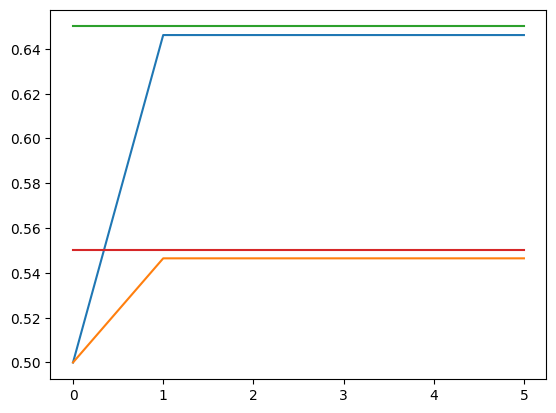

In [5]:
# initialize guesses

# guess bias towards heads
p_A = 0.5
p_B = 0.5

# guesses for which coins generated which trial
coin_guesses = []

N_ITERATIONS = 5

p_A_estimates = [p_A]
p_B_estimates = [p_B]

for i in range(N_ITERATIONS):
    print('iteration:', i)

    p_A_new_N = 0
    p_A_new_D = 0
    p_B_new_N = 0
    p_B_new_D = 0

    # iterate over trials, and compute (normalized) probabilities for coin flips, as
    # well as the new values for p_A and p_B
    for j, t in enumerate(trials):
        print('trial:'); print(t)
        prob_A = binom.pmf(t["n_heads"], N, A_BIAS)
        prob_B = binom.pmf(t["n_heads"], N, B_BIAS)

        prob_A_norm = prob_A / (prob_A + prob_B)
        prob_B_norm = prob_B / (prob_A + prob_B)

        print('prob A and B norm:', prob_A_norm, prob_B_norm)

        p_A_new_N += prob_A_norm * t["n_heads"]
        p_A_new_D += prob_A_norm

        p_B_new_N += prob_B_norm * t["n_heads"]
        p_B_new_D += prob_B_norm

        coin_guesses.append("A" if prob_A > prob_B else "B")

    print()
    
    p_A = p_A_new_N / (p_A_new_D * N)
    p_B = p_B_new_N / (p_B_new_D * N)

    p_A_estimates.append(p_A)
    p_B_estimates.append(p_B)

    print('new estimated biases:', p_A, p_B)

print('coin guesses and correct values:')
c = 0
for k in range(NUM_A_TRIALS + NUM_A_TRIALS):
    print('guessed:', coin_guesses[k], ", correct:", trials[k]["coin"])
    if coin_guesses[k] == trials[k]["coin"]:
        c += 1

print('% correct coin guesses:')
print(c / (NUM_A_TRIALS + NUM_B_TRIALS) * 100, "%")

plt.plot(p_A_estimates)
plt.plot(p_B_estimates)
plt.plot([A_BIAS for _ in range(N_ITERATIONS + 1)])
plt.plot([B_BIAS for _ in range(N_ITERATIONS + 1)])

plt.show()



